In [2]:
import numpy as np
from time import perf_counter

class GradientDescent:

    def _show_data(fun):
        def show_data_wrapper(*args, **kwargs):
            start_time = perf_counter()
            minimum, x, it = fun(*args, **kwargs)
            end_time = perf_counter()
            exec_time = end_time - start_time
            if kwargs.get('show_data', False):
                print(f'Found minimum at:')
                print(''.join([f'x{i+1} = {value}\n' for i, value in enumerate(x)]), end='')
                print(f'Minimum value: {minimum}')
                print(f'Iterations: {it}')
                print(f'Execution time: {exec_time}')
                print('-----------------------')
            return minimum, x, it
        return show_data_wrapper

    @staticmethod
    @_show_data
    def solve(fun, gradient, eps, beta, *args, **kwargs):
        it = 0
        x = np.array(args)
        gradient_value = np.array(gradient(*x))
        if not gradient_value.ndim: gradient_value = np.array([gradient_value])
        while any(abs(value) >= eps for value in gradient_value):
            it+=1
            x = x - beta*gradient_value
            gradient_value = np.array(gradient(*x))
            if not gradient_value.ndim: gradient_value = np.array([gradient_value])
        return fun(*x), x, it


In [4]:
f = lambda x: 2*x**2 + 3*x -1
gradient_f = lambda x: 4*x + 3

g = lambda x1, x2: 1 - 0.6*np.exp(-x1**2 - x2**2) - 0.4*np.exp(-(x1 + 1.75)**2 - (x2-1)**2)
gradient_g = lambda x1, x2: (1.2*x1*np.exp(-x1**2 - x2**2) + 0.8*(x1 + 1.75)*np.exp(-(x1 + 1.75)**2 - (x2 -1)**2),
                             1.2*x2*np.exp(-x1**2 - x2**2) + 0.8*(x2 -1)*np.exp(-(x1 + 1.75)**2 - (x2 -1)**2))

GradientDescent.solve(g, gradient_g, 0.00000000001, 0.25, 1, 2, show_data=True);
GradientDescent.solve(f, gradient_f, 0.00000000001, 0.25, 100, show_data=True);


Found minimum at:
x1 = -0.02194824923868987
x2 = 0.012541856713508309
Minimum value: 0.39276746841039845
Iterations: 139
Execution time: 0.0013405680000460052
-----------------------
Found minimum at:
x1 = -0.75
Minimum value: -2.125
Iterations: 1
Execution time: 4.088599996521225e-05
-----------------------


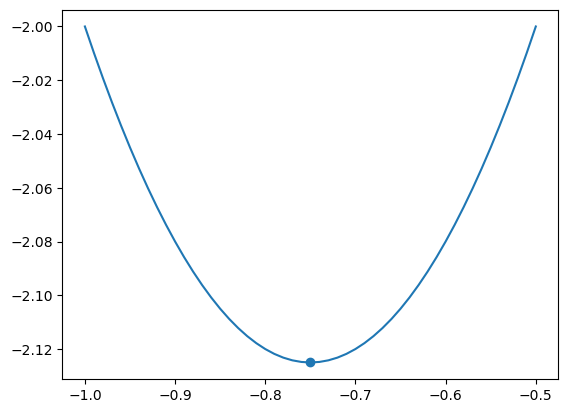

In [18]:
import matplotlib.pyplot as plt
from matplotlib import cm

x_axis = np.arange(-1, -0.49, 0.01)
y = f(x_axis)

minimum, x, it = GradientDescent.solve(f, gradient_f, 0.0000000001, 0.25, 1453, show_data=False);

fig, ax = plt.subplots()

ax.plot(x_axis, y)
ax.scatter(x, minimum)

plt.show()


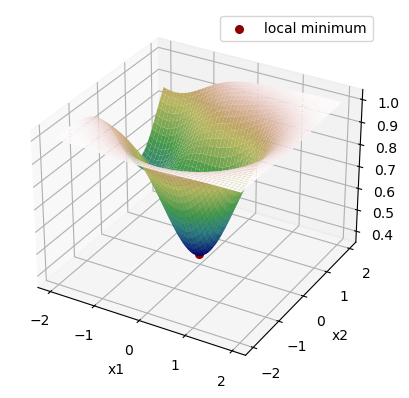

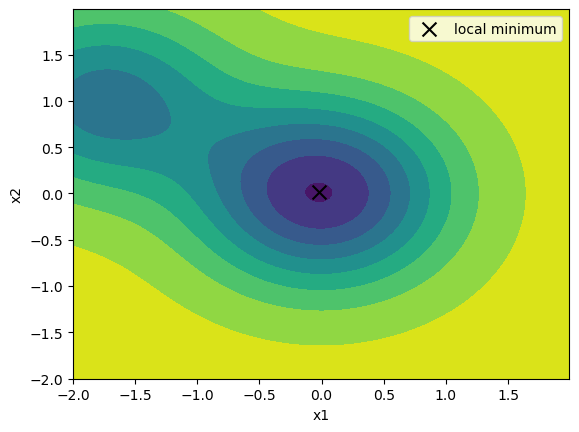

In [19]:
x1 = np.arange(-2, 2, 0.01)
x2 = np.arange(-2, 2, 0.01)
x1, x2 = np.meshgrid(x1, x2)
z = g(x1, x2)

minimum, x, it = GradientDescent.solve(g, gradient_g, 0.000000000001, 0.25, -2, -2, show_data=False);

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x1, x2, z, cmap=cm.gist_earth)
ax.scatter(x[0], x[1], minimum, c='darkred', s=30, label='local minimum')
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')

plt.show()

fig, ax = plt.subplots()

ax.tricontourf(x1.flatten(), x2.flatten(), z.flatten())
ax.scatter(x[0], x[1], color='black', marker='x', s=100, label='local minimum')
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')

plt.show()



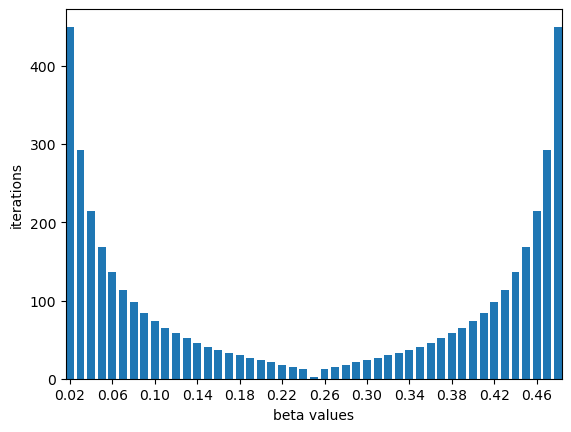

In [20]:
beta_set_start_f = 0.02; beta_set_stop_f = 0.48; beta_set_step_f = 0.01
beta_set_f = np.arange(beta_set_start_f, beta_set_stop_f + beta_set_step_f, beta_set_step_f)
x_random_set_f = np.random.uniform(-100, 100, 100)

results_f = [[GradientDescent.solve(f, gradient_f, 0.00000000000001, beta, x) for beta in beta_set_f] for x in x_random_set_f]
iterations_beta_set_f = np.transpose([[value[2] for value in x_set] for x_set in results_f])
iterations_beta_median_f = np.median(iterations_beta_set_f, axis=1)

plt.bar(beta_set_f, iterations_beta_median_f, width=0.0075)
plt.xlim(beta_set_start_f-0.0075/2, beta_set_stop_f+0.0075/2)
plt.xticks(beta_set_f[::4])
plt.xlabel('beta values')
plt.ylabel('iterations')

plt.show()


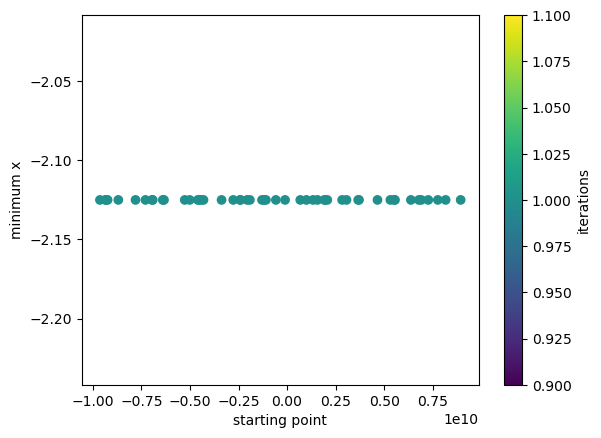

In [6]:
optimal_beta_f = round(beta_set_f[np.argmin(iterations_beta_median_f)], 2)

start_point_random_set_f = np.random.uniform(-10000000000, 10000000000, 50)

results_f = [GradientDescent.solve(f, gradient_f, 0.00000000000001, optimal_beta_f, x) for x in start_point_random_set_f]

minimum_set, x_set, iterations = zip(*results_f)

plt.scatter(start_point_random_set_f, minimum_set, c=iterations)
plt.colorbar(label='iterations')
plt.xlabel('starting point')
plt.ylabel('minimum x')

plt.show()


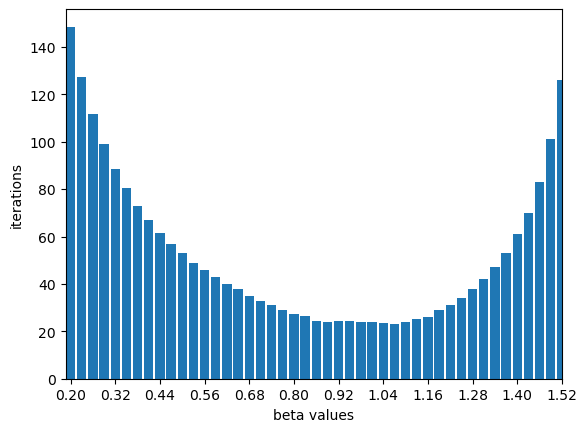

In [29]:
beta_set_start_g = 0.2; beta_set_stop_g = 1.5; beta_set_step_g = 0.03
beta_set_g = np.arange(beta_set_start_g, beta_set_stop_g + beta_set_step_g, beta_set_step_g)
x_random_set_g = np.random.uniform(-2.5, 2.5, (200, 2))

results_g = [[(GradientDescent.solve(g, gradient_g, 0.0000000001, beta, x1, x2)) for beta in beta_set_g] for x1, x2 in x_random_set_g]
iterations_beta_set_g = np.transpose([[value[2] for value in x_set] for x_set in results_g])
iterations_beta_median_g = np.median(iterations_beta_set_g, axis=1)

plt.bar(beta_set_g, iterations_beta_median_g, width=0.025)
plt.xlim(beta_set_start_g-0.025/2, beta_set_stop_g+0.025/2)
plt.xticks(beta_set_g[::4])
plt.xlabel('beta values')
plt.ylabel('iterations')

plt.show()

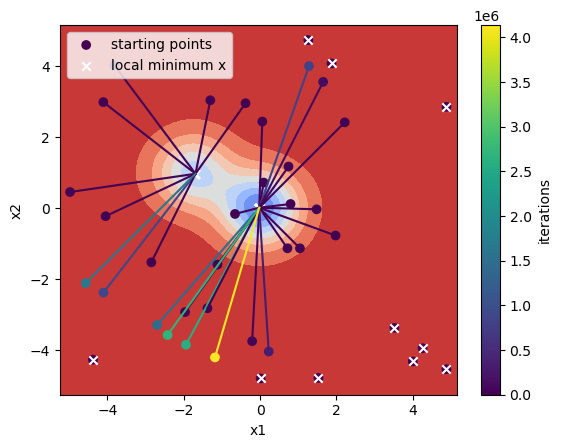

In [24]:
x1 = np.arange(-5.25, 5.25, 0.1)
x2 = np.arange(-5.25, 5.25, 0.1)
x1, x2 = np.meshgrid(x1, x2)
z = g(x1, x2)

plt.tricontourf(x1.flatten(), x2.flatten(), z.flatten(), cmap='coolwarm')

optimal_beta_g = round(beta_set_g[np.argmin(iterations_beta_median_g)], 2)

start_point_random_set_g = np.random.uniform(-5, 5, (40, 2))

results_f = [GradientDescent.solve(g, gradient_g, 0.00000001, optimal_beta_g, x1, x2) for x1, x2 in start_point_random_set_g]

minimum_set, x_set, iterations = zip(*results_f)

start_point_random_set_g_T = np.transpose(start_point_random_set_g)
x_set_T = np.transpose(x_set)
max_iterations = max(iterations)
for i in range(len(iterations)):
    plt.plot([start_point_random_set_g_T[0][i], x_set_T[0][i]], [start_point_random_set_g_T[1][i], x_set_T[1][i]], c=plt.cm.viridis(iterations[i]/max_iterations))

plt.scatter(start_point_random_set_g_T[0], start_point_random_set_g_T[1], c=iterations, label='starting points')
plt.colorbar(label='iterations')
plt.scatter(x_set_T[0], x_set_T[1], c='white', marker='x', label='local minimum x')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

plt.show()